* Rectangular coil - 10 turns
.Units MM
.Default Cond Cu
N N1 0 0 0.0
N N2 20.0 0 0.0
N N3 20.0 10.0 0.0
N N4 0 10.0 0.0
N N5 0 0 1.2
N N6 20.0 0 1.2
N N7 20.0 10.0 1.2
N N8 0 10.0 1.2
N N9 0 0 2.4
N N10 20.0 0 2.4
N N11 20.0 10.0 2.4
N N12 0 10.0 2.4
N N13 0 0 3.5999999999999996
N N14 20.0 0 3.5999999999999996
N N15 20.0 10.0 3.5999999999999996
N N16 0 10.0 3.5999999999999996
N N17 0 0 4.8
N N18 20.0 0 4.8
N N19 20.0 10.0 4.8
N N20 0 10.0 4.8
N N21 0 0 6.0
N N22 20.0 0 6.0
N N23 20.0 10.0 6.0
N N24 0 10.0 6.0
N N25 0 0 7.199999999999999
N N26 20.0 0 7.199999999999999
N N27 20.0 10.0 7.199999999999999
N N28 0 10.0 7.199999999999999
N N29 0 0 8.4
N N30 20.0 0 8.4
N N31 20.0 10.0 8.4
N N32 0 10.0 8.4
N N33 0 0 9.6
N N34 20.0 0 9.6
N N35 20.0 10.0 9.6
N N36 0 10.0 9.6
N N37 0 0 10.799999999999999
N N38 20.0 0 10.799999999999999
N N39 20.0 10.0 10.799999999999999
N N40 0 10.0 10.799999999999999
S S1 N1 N2 1.0
S S2 N2 N3 1.0
S S3 N3 N4 1.0
S S4 N4 N1 1.0
S S5 N5 N6 1.0
S S6 N6 N7 1.0
S S7 N

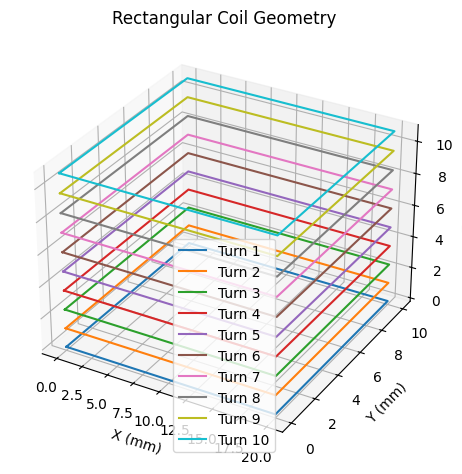

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_rectangular_coil(length, width, turns, wire_diameter=1.0, units='MM'):
    nodes = []
    segments = []
    node_counter = 1
    node_names = []
    spacing = wire_diameter * 1.2  # Space between turns
    for turn in range(turns):
        offset = turn * spacing
        # Four corners
        n1 = (0, 0, offset)
        n2 = (length, 0, offset)
        n3 = (length, width, offset)
        n4 = (0, width, offset)
        nodes.extend([n1, n2, n3, n4])
        ns = [f'N{node_counter}', f'N{node_counter+1}', f'N{node_counter+2}', f'N{node_counter+3}']
        node_names.append(ns)
        segments.extend([
            (f'S{4*turn+1}', ns[0], ns[1]),
            (f'S{4*turn+2}', ns[1], ns[2]),
            (f'S{4*turn+3}', ns[2], ns[3]),
            (f'S{4*turn+4}', ns[3], ns[0])
        ])
        node_counter += 4
    # Build FastHenry input
    fh_lines = [f'* Rectangular coil - {turns} turns', f'.Units {units}', '.Default Cond Cu']
    seen_nodes = set()
    for turn_nodes, offset in zip(node_names, [spacing*i for i in range(turns)]):
        corners = [(0, 0, offset), (length, 0, offset), (length, width, offset), (0, width, offset)]
        for name, (x, y, z) in zip(turn_nodes, corners):
            if name not in seen_nodes:
                fh_lines.append(f'N {name} {x} {y} {z}')
                seen_nodes.add(name)
    for sname, n1, n2 in segments:
        fh_lines.append(f'S {sname} {n1} {n2} {wire_diameter}')
    coil_segments = ' '.join([s[0] for s in segments])
    fh_lines.extend([f'O Coil1', f'  {coil_segments}', f'.End'])
    fh_content = '\n'.join(fh_lines)
    return fh_content, nodes, segments, node_names, turns, length, width, spacing

# Visualization

def plot_coil(node_names, turns, length, width, spacing):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for turn_idx, ns in enumerate(node_names):
        offset = turn_idx * spacing
        xs = [0, length, length, 0, 0]
        ys = [0, 0, width, width, 0]
        zs = [offset] * 5
        ax.plot(xs, ys, zs, label=f'Turn {turn_idx+1}')
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_zlabel('Z (mm)')
    ax.legend()
    plt.title('Rectangular Coil Geometry')
    plt.tight_layout()
    plt.show()

# Usage example:
length = 20.0
width = 10.0
turns = 10
wire_diameter = 1.0
fh_content, nodes, segments, node_names, turns, length, width, spacing = generate_rectangular_coil(length, width, turns, wire_diameter)
print(fh_content)
plot_coil(node_names, turns, length, width, spacing)


* Rectangular spiral coil: 2 turns
.Units MM
.Default Cond Cu
N N1 0.0000 0.0000 0.0000
N N2 25.0000 0.0000 0.0000
N N3 25.0000 15.0000 0.0000
N N4 0.0000 15.0000 0.0000
N N5 0.0000 1.0000 0.0000
N N6 24.0000 1.0000 0.0000
N N7 24.0000 14.0000 0.0000
N N8 1.0000 14.0000 0.0000
S S1 N1 N2 0.8
S S2 N2 N3 0.8
S S3 N3 N4 0.8
S S4 N4 N5 0.8
S S5 N5 N6 0.8
S S6 N6 N7 0.8
S S7 N7 N8 0.8
O Coil1
  S1 S2 S3 S4 S5 S6 S7
.End


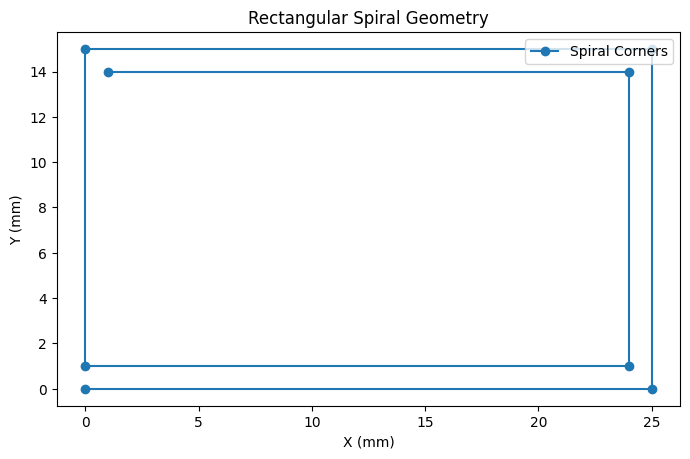

In [22]:
import matplotlib.pyplot as plt

def generate_rectangular_spiral(width, length, num_turns, pitch, wire_diameter, units='MM'):
    points = []
    
    for turn in range(num_turns):
        # Current rectangle bounds
        x0 = turn * pitch
        y0 = turn * pitch
        x1 = width - turn * pitch
        y1 = length - turn * pitch
        
        # Stop if the next turn would collapse
        if x1 <= x0 or y1 <= y0:
            print("no space for further turns")
            break
        
        # Each rectangle turn adds 4 corners in order
        if turn == 0:
            # start at lower-left
            points.extend([
                (x0, y0),  # start
                (x1, y0),  # right
                (x1, y1),  # up
                (x0, y1),  # left
            ])
        else:
            # connect from previous end to next inner rectangle
            # previous end is (x_prev, y_prev)
            x_prev, y_prev = points[-1]
            if y_prev != y0:  # drop down to new start level
                points.append((x_prev, y0))
            # then trace next inner rectangle
            points.extend([
                (x1, y0),  # right
                (x1, y1),  # up
                (x0, y1),  # left
            ])
    
    # FastHenry data
    node_names = [f'N{i+1}' for i in range(len(points))]
    nodes = [(name, x, y, 0) for name, (x, y) in zip(node_names, points)]
    segments = [(f'S{i+1}', node_names[i], node_names[i+1]) for i in range(len(points)-1)]
    
    # Generate FastHenry file lines
    fh_lines = [
        f'* Rectangular spiral coil: {num_turns} turns',
        f'.Units {units}',
        '.Default Cond Cu'
    ]
    for (n, x, y, z) in nodes:
        fh_lines.append(f'N {n} {x:.4f} {y:.4f} {z:.4f}')
    for (s, n1, n2) in segments:
        fh_lines.append(f'S {s} {n1} {n2} {wire_diameter}')
    
    coil_segments = ' '.join([s for s, _, _ in segments])
    fh_lines.extend([f'O Coil1', f'  {coil_segments}', f'.End'])
    
    fh_content = '\n'.join(fh_lines)
    return fh_content, nodes, segments, points


def plot_rectangular_spiral(points, width, length):
    xs, ys = zip(*points)
    plt.figure(figsize=(7,5))
    plt.plot(xs, ys, '-o', label='Spiral Corners')
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.title('Rectangular Spiral Geometry')
    plt.xlim(-width*0.05, width*1.05)
    plt.ylim(-length*0.05, length*1.05)
    plt.gca().set_aspect('equal')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


# Example usage
length = 15.0   # mm
width = 25.0    # mm
num_turns = 2
pitch = 1       # mm
diameter = 0.8  # mm

fh_content, nodes, segments, points = generate_rectangular_spiral(
    width=width, length=length, num_turns=num_turns, pitch=pitch, wire_diameter=diameter)

print(fh_content)
plot_rectangular_spiral(points, width, length)
